In [5]:
import sys
sys.version



'3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]'

In [67]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")

HEADERS = {}
if GITHUB_TOKEN:
    HEADERS["Authorization"] = f"token {GITHUB_TOKEN}"



In [43]:
def github_get(url, params=None):
    response = requests.get(url, headers=HEADERS, params=params)

    if response.status_code != 200:
        print("Status Code:", response.status_code)
        print("Response:", response.text)
        raise Exception("GitHub API request failed")

    return response.json()


In [45]:
rate_limit = github_get("https://api.github.com/rate_limit")
rate_limit["rate"]


{'limit': 60,
 'remaining': 57,
 'reset': 1767864941,
 'used': 3,
 'resource': 'core'}

In [47]:
def fetch_issues_and_prs(owner, repo, state="open", per_page=50):
    url = f"https://api.github.com/repos/{owner}/{repo}/issues"

    data = github_get(url, {
        "state": state,
        "per_page": per_page
    })

    issues, prs = [], []

    for item in data:
        if "pull_request" in item:
            prs.append(item)
        else:
            issues.append(item)

    return issues, prs



In [49]:
issues, prs = fetch_issues_and_prs("facebook", "react")

print("Issues:", len(issues))
print("Pull Requests:", len(prs))



Issues: 16
Pull Requests: 34


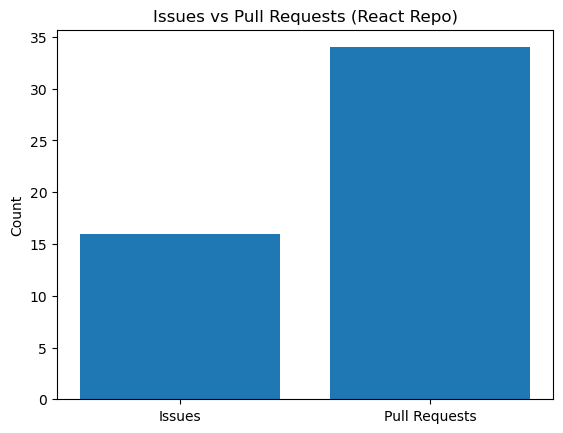

In [51]:
plt.figure()
plt.bar(["Issues", "Pull Requests"], [len(issues), len(prs)])
plt.title("Issues vs Pull Requests (React Repo)")
plt.ylabel("Count")
plt.show()



In [53]:
def fetch_contributors(owner, repo, per_page=30):
    url = f"https://api.github.com/repos/{owner}/{repo}/contributors"
    return github_get(url, {"per_page": per_page})



In [55]:
contributors = fetch_contributors("facebook", "react")

df_contrib = pd.DataFrame([{
    "username": c["login"],
    "contributions": c["contributions"]
} for c in contributors])

df_contrib.head()


,username,contributions
0,sebmarkbage,1927
1,zpao,1778
2,gaearon,1681
3,acdlite,1419
4,sophiebits,1291


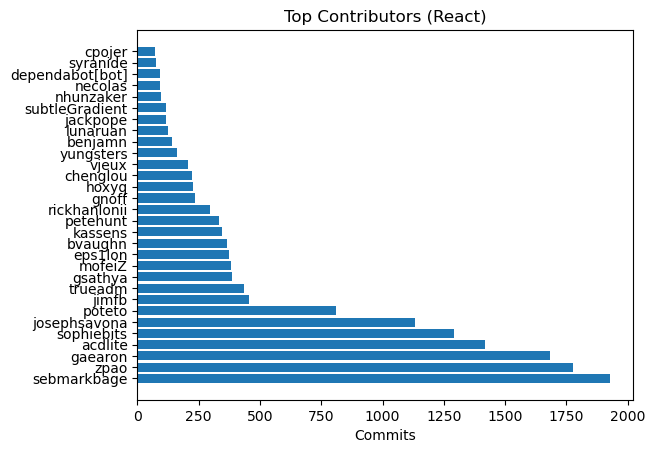

In [57]:
plt.figure()
plt.barh(df_contrib["username"], df_contrib["contributions"])
plt.xlabel("Commits")
plt.title("Top Contributors (React)")
plt.show()


In [59]:
def export_issues_to_csv(issues, filename):
    df = pd.DataFrame([{
        "id": i["id"],
        "title": i["title"],
        "state": i["state"],
        "comments": i["comments"]
    } for i in issues])

    df.to_csv(filename, index=False)
    print(f"Saved → {filename}")


In [61]:
export_issues_to_csv(issues, "react_issues.csv")


Saved → react_issues.csv


In [63]:
def analyze_repository(owner, repo):
    print(f"\nAnalyzing {owner}/{repo}...\n")

    issues, prs = fetch_issues_and_prs(owner, repo)
    contributors = fetch_contributors(owner, repo)

    print(f"Issues: {len(issues)}")
    print(f"Pull Requests: {len(prs)}")
    print(f"Top Contributors: {len(contributors)}")

    export_issues_to_csv(issues, f"{repo}_issues.csv")


In [65]:
analyze_repository("wordpress", "gutenberg")



Analyzing wordpress/gutenberg...

Issues: 16
Pull Requests: 34
Top Contributors: 30
Saved → gutenberg_issues.csv
